In [4]:
import numpy as np
from scipy.stats import *
from sympy import *
from IPython.display import Math
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

def rrstr(x,n): # округление до n знаков после запятой
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

v_rrstr = np.vectorize(rrstr)

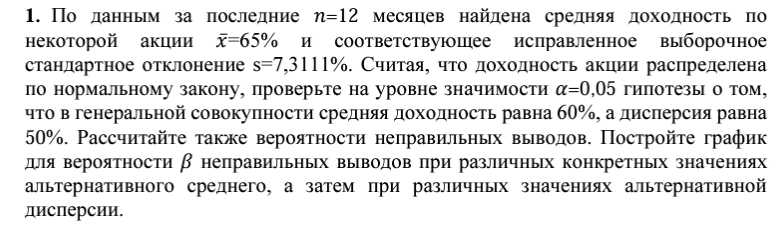

In [12]:
n = 12
x_ = 65
sigma = 7.3111
alpha = 0.05

In [13]:
mu0 = 60

z = (x_ - mu0)/ (sigma / np.sqrt(n))

z_crit_1 =  t.ppf(1-alpha/2,n-1)

p_value = 2*(1 -t.cdf(abs(z),n-1))


# Вывод результатов
display(Math(r"\text{Тестовая статистика (z): }" + str(v_rrstr(z,3)) ))

display(Math(r"\text{Критическое значение для двустороннего теста } (z_{crit_1}): "+ str(v_rrstr(z_crit_1,3))))

display(Math(r"\text{P-значение для двустороннего теста: }"+ str(v_rrstr(p_value,4))))


# Проверка гипотезы
if alpha > p_value:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.   ".replace(' ','~') + r'\mu \neq ' + str(mu0)))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.".replace(' ','~')))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$$
\beta = P(H_0|H_1) = P(-t_{\alpha} < T < t_{\alpha}|\mu_0 = \mu_1) = 0
$$

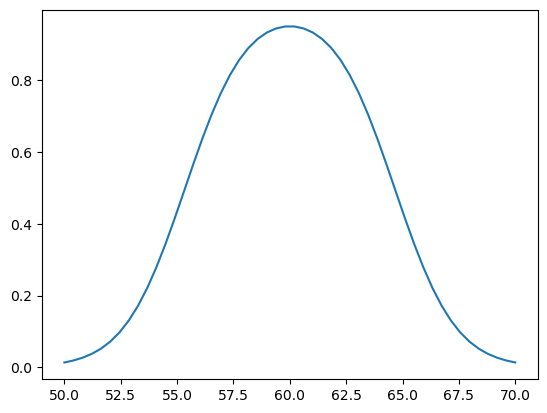

In [14]:
mu1 = np.linspace(50,70,50)
se = sigma/n**0.5
h = (mu1 - mu0)/se
beta = t.cdf(z_crit_1 - h, n-1) - t.cdf(-z_crit_1 - h, n-1)
plt.plot(mu1,beta)

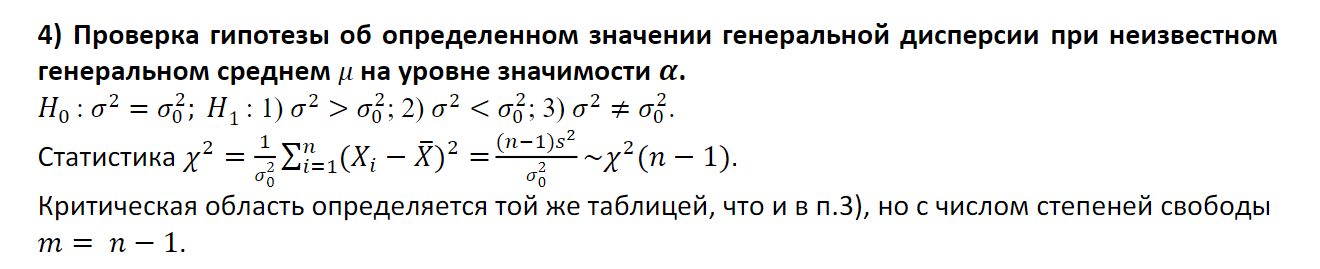

In [64]:
def one_rrstr(x,n=0): # округление до n знаков после запятой
    if n == 0:
        return str(x)
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

In [84]:
def TVH_2(text,sigma_0,sigma_1,alpha,splitter = ';',locale = 'rus') -> tuple:
    """Пусть X- =(x1,…,x_n) - реализация случайной выборки X =(X1,…,X_n)
    из нормального распределения N(μ;σ2).
    Проверяется на уровне значимости α = `alpha`
    гипотеза H0: σ = `sigma_0` против альтернативной гипотезы
    H1: σ ≠ `sigma_0` с критическим множеством вида
    Kα = (0; A) ∪ (B; +∞). 
    - Найдите значение статистики критерия. 
    - Найдите границы А и В критического множества и проверьте гипотезу H0. 
    - Найдите P-значение критерия. 
    - Найдите вероятность ошибки второго рода β для σ1 = `sigma_1`
    
    
    Исходные данные: X- = `text`


    ## Args:
        text (str): Строка перечисления всех чисел, данных как X-
        sigma_0 (numerical): Значение стандартного отклонения для гипотезы H0
        sigma_1 (numerical): Значение стандартного отклонения для вычисления ошибки второго рода
        alpha (numerical): Уровень значимости
        splitter (str, optional): Разделитель между каждым значением в `text`. Стандартно равно =  ';'.
        locale (str, optional): Локализция данных - если целая и дробная часть каждого числа из `text разделена не запятой, то нужно изменить значение этого параметра на любое другое. Стандартно равно =  'rus'.

    ## Prints
        `answer` каждое значение последовательно.<br>C запятой вместо точки и сокращенное до соответствующего количества десятичных знаков.

    ## Returns:
        `answer` (tuple): Соответствующие значения
    """
    from scipy.stats import chi2
    import numpy as np



    # Взять данные из строки
    if locale== 'rus':
            x = np.array(text.replace(',','.').split(splitter)).astype(float)
    else:
            x = np.array(text.split(splitter)).astype(float)

    # Вычислить размер выборки
    n = x.size

    # Вычислить наблюдаемое значение критерия chi2
    chi2_obs = sum((x-x.mean())**2)/sigma_0**2

    # Вычислить критические значения критерия chi2
    chi2_crit_1 =  chi2.ppf(alpha/2,n-1)
    chi2_crit_2 =  chi2.isf(alpha/2,n-1)

    p_value = 2 *min(chi2.cdf((chi2_obs), df=n-1),chi2.sf((chi2_obs), df=n-1) )

    # Вычислить вероятность ошибки второго рода
    lambda_ = (sigma_1 / sigma_0)**2
    beta = chi2.cdf(chi2_crit_2 / lambda_, df=n-1) - chi2.cdf(chi2_crit_1 / lambda_, df=n-1)


    # Вывод результатов
    print("Значение статистики критерия = " + (one_rrstr(chi2_obs,3)) )
    print('\nГраницы критического множества:')
    print("Граница A = "+ (one_rrstr(chi2_crit_1,3)))
    print("Граница B = "+ (one_rrstr(chi2_crit_2,3)))
    print("\nP-значение для двустороннего теста: "+ (one_rrstr(p_value,3)))
    print("\nВероятность ошибки второго рода = " + one_rrstr(beta,3))

    # Проверка гипотезы
    if alpha > p_value:
        print("\nОтвергаем нулевую гипотезу H0 в пользу альтернативной H_1.")
    else:
        print("\nНе хватает оснований отвергнуть нулевую гипотезу H_0.   ")

    return (chi2_obs, chi2_crit_1, chi2_crit_2,p_value,beta )

In [85]:
text = '0,185; 1,269; 2,034; 1,356; 2,498; -0,185; 1,665; 0,436; 0,226; 0,556; 0,858; 1,273; -0,107; 2,228; 1,736; -0,526; 2,892; 3,352; 2,542; 1,007; 0,0; 2,402; 0,754; 2,591; 1,445; 2,314; 1,613; 2,008; 1,222; 3,228; 1,353; 1,664; 3,338; -0,313; -0,226; 2,305; -0,116; 3,406; 0,743; 0,365; 3,383; 2,883; 3,32; 2,234; 0,237'
sigma_0 = 1.13
sigma_1 = 1.23
alpha = 0.03

TVH_2(text,sigma_0,sigma_1,alpha)

Значение статистики критерия = 48,705

Границы критического множества:
Граница A = 26,164
Граница B = 66,763

P-значение для двустороннего теста: 0,579

Вероятность ошибки второго рода = 0,897

Не хватает оснований отвергнуть нулевую гипотезу H_0.   


(48.704886765691235,
 26.163908862470404,
 66.76278767448943,
 0.5787323846425505,
 0.8973253901302555)

In [81]:
text = '0,889; 1,514; 2,846; 2,811; 0,84; 0,945; 0,02; -0,441; -0,796; 3,739; 0,688; 0,777; -0,233; 2,284; -0,681; 1,056; 0,21; 1,8; 0,687; -0,144; 1,285; 1,851; 1,402; 1,695; 0,533; 0,87; 0,486; 0,874; 0,312; -0,821'
sigma_0 = 1.14
sigma_1 = 1.24
alpha = 0.02

TVH_2(text,sigma_0,sigma_1,alpha)

Значение статистики критерия = 26,996

Границы критического множества:
Граница A = 14,256
Граница B = 49,588

P-значение для двустороннего теста: 0,856

Вероятность ошибки второго рода = 0,9405

Не хватает оснований отвергнуть нулевую гипотезу H_0.   


(26.996043295372928,
 14.256454576274688,
 49.58788447289881,
 0.8561628289353819,
 0.9404557708620707)

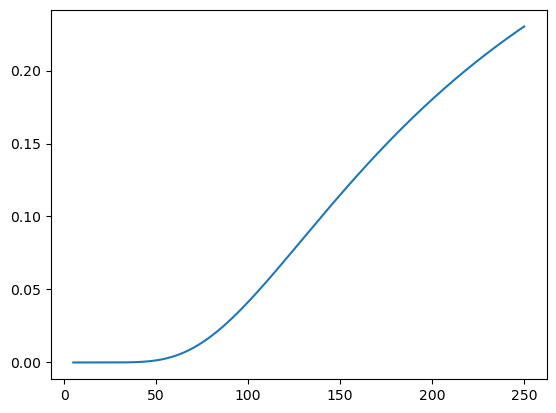

In [16]:
sigma1 = np.linspace(5,250,1000)

beta = t.cdf(chi2_crit_2*(sigma0/sigma1) , n-1) - t.cdf(chi2_crit_1*(sigma0/sigma1), n-1)
plt.plot(sigma1,beta)

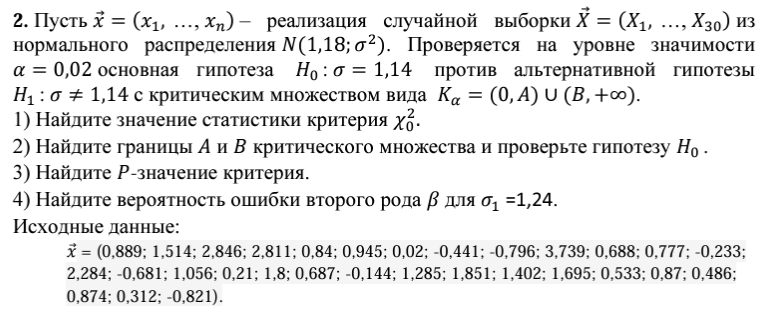

![image.png](attachment:image.png)

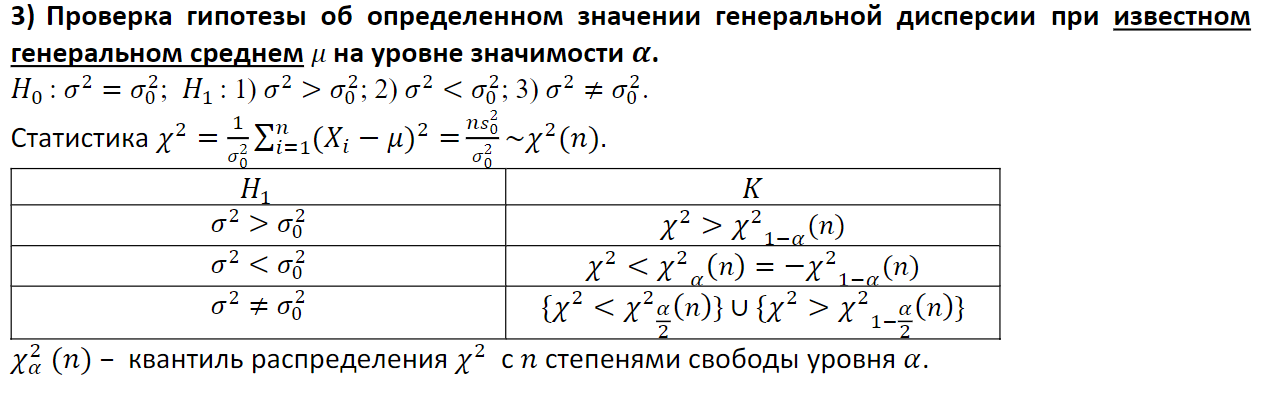

In [62]:

text = '0,889; 1,514; 2,846; 2,811; 0,84; 0,945; 0,02; -0,441; -0,796; 3,739; 0,688; 0,777; -0,233; 2,284; -0,681; 1,056; 0,21; 1,8; 0,687; -0,144; 1,285; 1,851; 1,402; 1,695; 0,533; 0,87; 0,486; 0,874; 0,312; -0,821'
mu0 = 1.18
sigma_0 = 1.14  # Нулевая гипотеза
sigma_1 = 1.24  # Альтернативная гипотеза
alpha = 0.02
splitter = ';'
locale = 'rus'


def TVH_1(text,mu0,sigma_0,sigma_1,alpha,splitter = ';',locale = 'rus') -> tuple:
    """Пусть X- =(x1,…,x_n) - реализация случайной выборки X =(X1,…,X_n)
    из нормального распределения N(`mu0`;σ2).
    Проверяется на уровне значимости α = `alpha`
    гипотеза H0: σ = `sigma_0` против альтернативной гипотезы
    H1: σ ≠ `sigma_0` с критическим множеством вида
    Kα = (0; A) ∪ (B; +∞). 
    - Найдите значение статистики критерия. 
    - Найдите границы А и В критического множества и проверьте гипотезу H0. 
    - Найдите P-значение критерия. 
    - Найдите вероятность ошибки второго рода β для σ1 = `sigma_1`
    
    
    Исходные данные: X- = `text`


    ## Args:
        text (str): Строка перечисления всех чисел, данных как X-
        mu_0 (numerical): Значение математического ожидания нормального распределения X
        sigma_0 (numerical): Значение стандартного отклонения для гипотезы H0
        sigma_1 (numerical): Значение стандартного отклонения для вычисления ошибки второго рода
        alpha (numerical): Уровень значимости
        splitter (str, optional): Разделитель между каждым значением в `text`. Стандартно равно =  ';'.
        locale (str, optional): Локализция данных - если целая и дробная часть каждого числа из `text разделена не запятой, то нужно изменить значение этого параметра на любое другое. Стандартно равно =  'rus'.

    ## Prints
        `answer` каждое значение последовательно.<br>C запятой вместо точки и сокращенное до соответствующего количества десятичных знаков.

    ## Returns:
        `answer` (tuple): Соответствующие значения
    """
    from scipy.stats import t,chi2
    import numpy as np



    # Взять данные из строки
    if locale== 'rus':
            x = np.array(text.replace(',','.').split(splitter)).astype(float)
    else:
            x = np.array(text.split(splitter)).astype(float)

    # Вычислить размер выборки
    n = x.size

    # Вычислить наблюдаемое значение критерия chi2
    chi2_obs = sum((x-mu0)**2)/sigma_0**2

    # Вычислить критические значения критерия chi2
    chi2_crit_1 =  chi2.ppf(alpha/2,n)
    chi2_crit_2 =  chi2.isf(alpha/2,n)

    p_value = 2 *min(chi2.cdf((chi2_obs), df=n),chi2.sf((chi2_obs), df=n) )

    # Вычислить вероятность ошибки второго рода
    lambda_ = (sigma_1 / sigma_0)**2
    beta = chi2.cdf(chi2_crit_2 / lambda_, df=n) - chi2.cdf(chi2_crit_1 / lambda_, df=n)


    # Вывод результатов
    print("Значение статистики критерия = " + (one_rrstr(chi2_obs,3)) )
    print('\nГраницы критического множества:')
    print("Граница A = "+ (one_rrstr(chi2_crit_1,3)))
    print("Граница B = "+ (one_rrstr(chi2_crit_2,3)))
    print("\nP-значение для двустороннего теста: "+ (one_rrstr(p_value,3)))
    print("\nВероятность ошибки второго рода = " + one_rrstr(beta,3))

    # Проверка гипотезы
    if alpha > p_value:
        print("\nОтвергаем нулевую гипотезу H0 в пользу альтернативной H_1.")
    else:
        print("\nНе хватает оснований отвергнуть нулевую гипотезу H_0.   ")

    return (chi2_obs, chi2_crit_1, chi2_crit_2,p_value,beta )

TVH_1(text,mu0,sigma_0,sigma_1,alpha)

Значение статистики критерия = 28,680

Границы критического множества:
Граница A = 14,953
Граница B = 50,892

P-значение для двустороннего теста: 0,931

Вероятность ошибки второго рода = 0,939

Не хватает оснований отвергнуть нулевую гипотезу H_0.   


(28.679699907663903,
 14.953456528455435,
 50.892181311517085,
 0.931069638279689,
 0.9392983267568007)

In [63]:
text = '0,185; 1,269; 2,034; 1,356; 2,498; -0,185; 1,665; 0,436; 0,226; 0,556; 0,858; 1,273; -0,107; 2,228; 1,736; -0,526; 2,892; 3,352; 2,542; 1,007; 0,0; 2,402; 0,754; 2,591; 1,445; 2,314; 1,613; 2,008; 1,222; 3,228; 1,353; 1,664; 3,338; -0,313; -0,226; 2,305; -0,116; 3,406; 0,743; 0,365; 3,383; 2,883; 3,32; 2,234; 0,237'
mu0 = 1.83
sigma_0 = 1.13  # Нулевая гипотеза
sigma_1 = 1.23  # Альтернативная гипотеза
alpha = 0.03

TVH_1(text,mu0,sigma_0,sigma_1,alpha)

Значение статистики критерия = 52,570

Границы критического множества:
Граница A = 26,933
Граница B = 67,994

P-значение для двустороннего теста: 0,409

Вероятность ошибки второго рода = 0,896

Не хватает оснований отвергнуть нулевую гипотезу H_0.   


(52.56962174015195,
 26.933468384752995,
 67.99365713642207,
 0.4085111003179421,
 0.8958397686074357)